### Importing Libraries for data manipulation and visualization

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving studentdemo.xlsx to studentdemo.xlsx


In [ ]:
student = pd.read_excel('studentdemo.xlsx')
student.head()

,sex,age,address,internet,romantic,Dalc,absences,G1,G2,G3
0,F,18,U,no,no,1,6,5,6,6
1,F,17,U,yes,no,1,4,5,5,6
2,F,15,U,yes,no,2,10,7,8,10
3,F,15,U,yes,yes,1,2,15,14,15
4,F,16,U,no,no,1,4,6,10,10


### Dataset size

In [ ]:
student.shape

(395, 10)

### Dataset Info

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       395 non-null    object
 1   age       395 non-null    int64 
 2   address   395 non-null    object
 3   internet  395 non-null    object
 4   romantic  395 non-null    object
 5   Dalc      395 non-null    int64 
 6   absences  395 non-null    int64 
 7   G1        395 non-null    int64 
 8   G2        395 non-null    int64 
 9   G3        395 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 31.0+ KB


### Descriptive Statistics

In [ ]:
student.describe()

,age,Dalc,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.481013,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.890741,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,1.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
student.groupby(['sex', 'internet'])[['G1', 'G2', 'G3']].mean()

G1         G2         G3
sex internet                                 
F   no         9.763158   9.657895   9.184211
    yes       10.811765  10.552941  10.141176
M   no        11.214286   9.785714   9.714286
    yes       11.232704  11.301887  11.125786

### Frequency distibutions and countplots using seaborn 

In [ ]:
cat_df = student.select_dtypes(include=['object'])

for col in cat_df.columns:
    freq = student[col].value_counts()
    freq = pd.DataFrame(freq)
    print(col, '\n ______________________')
    print(freq)

sex 
 ______________________
   sex
F  208
M  187
address 
 ______________________
   address
U      307
R       88
internet 
 ______________________
     internet
yes       329
no         66
romantic 
 ______________________
     romantic
no        263
yes       132


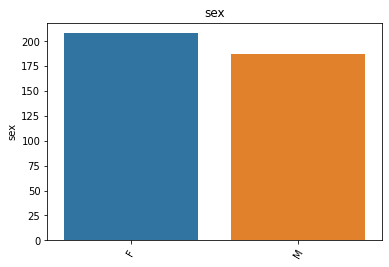

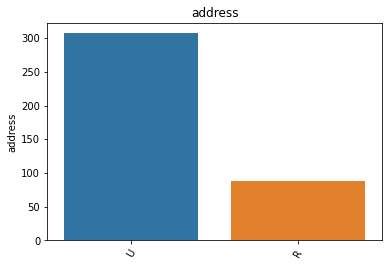

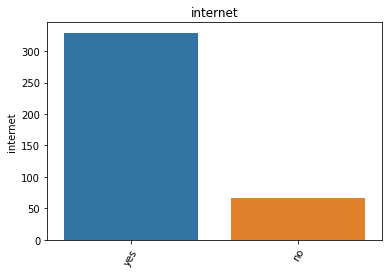

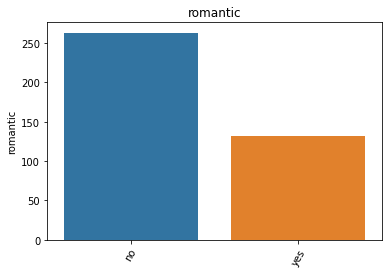

In [ ]:
def countplots():
    for col in cat_df:
        cat = student[col].value_counts() # this hould make the adjust the scoop of to the vie
        chart = sns.barplot(cat.index , cat)
        chart.set_xticklabels(chart.get_xticklabels() , rotation = 60)

        plt.title(col)
        plt.show()
countplots()

### Plotly visualizations

In [ ]:
px.bar(student, x='sex', y='G1', color='internet')

### Histograms 

In [ ]:
fig = px.histogram(student, x="G3", title='Histogram of G3')
fig.show()

In [ ]:
fig = px.histogram(student, x="G3", color="address",
                   marginal="box", # or violin, rug
                   hover_data=student.columns)
fig.show()

In [ ]:
fig = px.histogram(student, x="G3", color="sex",
                   marginal="violin",
                   hover_data=student.columns)
fig.show()

In [ ]:
fig = px.histogram(student, x="G3", color="internet",
                   marginal="box", # or violin, rug
                   hover_data=student.columns)
fig.show()

In [ ]:
fig = px.histogram(student, x="G3", color="romantic",
                   marginal="box", # or violin, rug
                   hover_data=student.columns)
fig.show()

In [ ]:
fig = px.histogram(student, x="G3", color="romantic",
                    # or violin, rug
                   hover_data=student.columns)
fig.show()

### Distribution plots 

In [ ]:
G1 = student.G1 -20 #-15 and +15 is the range
G2 = student.G2 
G3 = student.G3 +20

scores = [G1, G2, G3]

group_labels = ['Exam 1', 'Exam 2', 'Final Exam']

colors = ['slategray', 'green', 'magenta']
# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(scores, group_labels, colors=colors,
                         bin_size=1, show_rug=True)

# Add title
fig.update_layout(title_text='Histograms and Curve Plots of G1, G2, and G3')
fig.show()

### Bubble Charts

In [ ]:
fig = px.scatter(student, x='G1', y='G3', size="absences", color="sex", size_max=15, 
                 title='Bubble chart of G1, and G3, and absences')
fig.show()

In [ ]:
fig = px.scatter(student, x='G1', y='G3', size="Dalc", color="sex", size_max=20, 
                title='Bubble chart of G1, and G3, and weekday alcoholism')
fig.show()

### Scatter plots

In [ ]:
px.scatter(student, x='G1', y='G2', color='internet', title='Scatterplot of G1 and G2')

In [ ]:
px.scatter(student, x='G2', y='G3', color='romantic', title='Scatterplot of G2 and G3')

### Regression plots 

In [ ]:
px.scatter(student, x='G1', y='G2', color='internet', title='Regession plot of G1 and G2',
          trendline='ols')

In [ ]:
px.scatter(student, x='G2', y='G3', color='romantic', title='Regression plot of G2 and G3',
          trendline='ols')

### Scatter plot Matrix

In [ ]:
fig = px.scatter_matrix(student,
    dimensions=["age", "absences", "Dalc", "G1", "G2", "G3"],
    color="sex")
fig.show()

In [ ]:
fig = px.scatter_matrix(student,
    dimensions=["age", "absences", "Dalc", "G1", "G2", "G3"],
    color="address")
fig.show()

### Heatmaps 

In [ ]:
matrix = student.corr()
matrix

,age,Dalc,absences,G1,G2,G3
age,1.000000,0.131125,0.175230,-0.064081,-0.143474,-0.161579
Dalc,0.131125,1.000000,0.111908,-0.094159,-0.064120,-0.054660
absences,0.175230,0.111908,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.094159,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.064120,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,-0.054660,0.034247,0.801468,0.904868,1.000000


In [ ]:
fig = px.imshow(matrix)
fig.show()

### Violin and Boxplots

In [ ]:
px.violin(student, y='G1')

In [ ]:
px.violin(student, y='G1', box=True)

In [ ]:
px.violin(student, y='G1',color = 'romantic', violinmode='overlay', box=True)

In [ ]:
px.violin(student, y='G1', x='address', box=True, color='sex')

In [ ]:
px.violin(student, y='G1', x='address', box=True, points='all', color='sex')